In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trayharoun","key":"e6989c8bbfd23f1adf81ba878e7f91ce"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other


In [ ]:
!unzip chest-xray-pneumonia.zip -d .


Streaming output truncated to the last 5000 lines.
  inflating: ./chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/

In [ ]:
!ls chest_xray

chest_xray  __MACOSX  test  train  val


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Paths
base_dir = "chest_xray"
train_path = os.path.join(base_dir, "train")
val_path = os.path.join(base_dir, "val")
test_path = os.path.join(base_dir, "test")

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Training generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation and test generators (only rescale)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


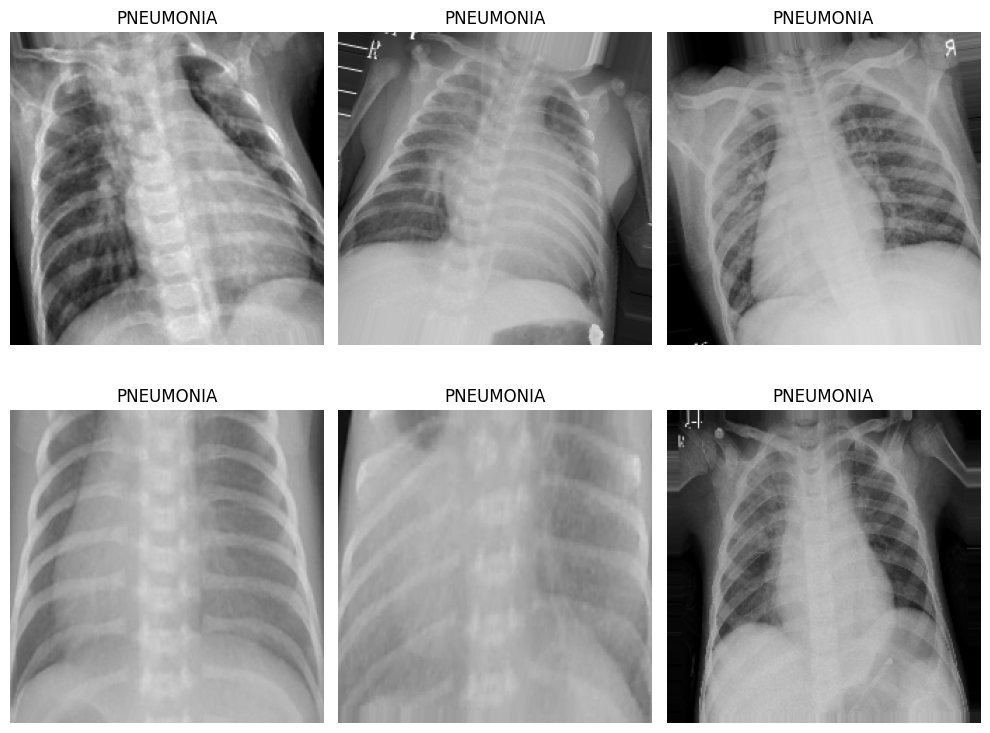

In [ ]:
# Show 6 random training images with augmentation
x_batch, y_batch = next(train_gen)

plt.figure(figsize=(10, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title("PNEUMONIA" if y_batch[i] else "NORMAL")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 624s 4s/step - accuracy: 0.7729 - loss: 0.5898 - val_accuracy: 0.8125 - val_loss: 0.4630
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.8861 - loss: 0.2707 - val_accuracy: 0.8125 - val_loss: 0.5672
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 621s 4s/step - accuracy: 0.9014 - loss: 0.2344 - val_accuracy: 0.7500 - val_loss: 0.5438
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 616s 4s/step - accuracy: 0.9101 - loss: 0.2285 - val_accuracy: 0.8750 - val_loss: 0.5787
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.9214 - loss: 0.2035 - val_accuracy: 0.8750 - val_loss: 0.5310
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 622s 4s/step - accuracy: 0.9272 - loss: 0.2033 - val_accuracy: 0.8125 - val_loss: 0.6610
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 626s 4s/step - accuracy: 0.9225 - loss: 0.1972 - val_accuracy: 0.8125 - val_loss: 0.4330
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 620s 4s/step - accuracy: 0.9281 - loss: 0.1812 - val_accu

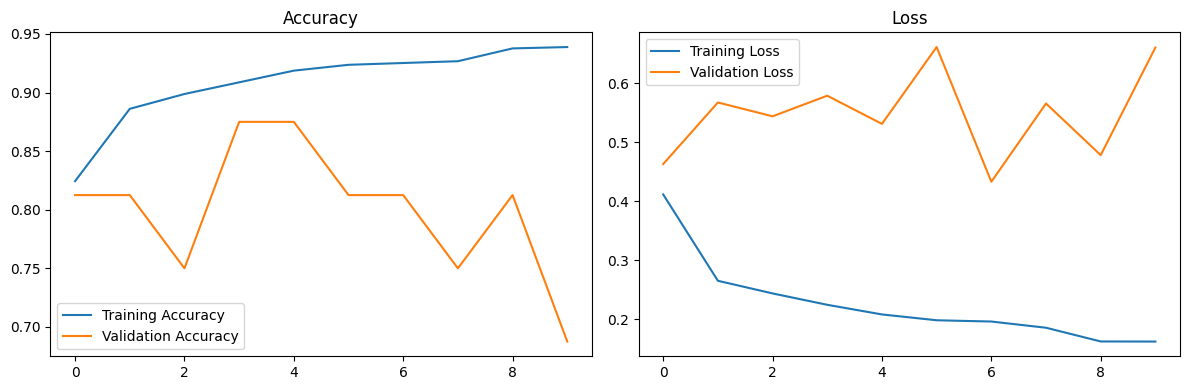

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


In [ ]:
model.save("custom_cnn_pneumoscan.keras")


In [ ]:
#download it :
from google.colab import files
files.download("custom_cnn_pneumoscan.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#switch it to drive :
from google.colab import drive
drive.mount('/content/drive')
!cp custom_cnn_pneumoscan.keras /content/drive/MyDrive/PneumoScan/



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Predict on test data
test_gen.reset()
y_pred_prob = model.predict(test_gen, verbose=1)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()
y_true = test_gen.classes


20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step


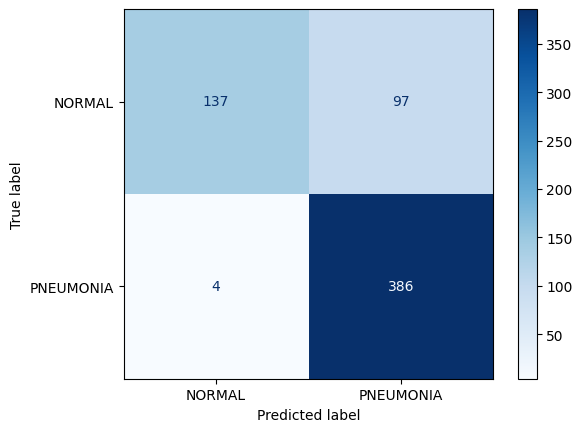

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["NORMAL", "PNEUMONIA"])
disp.plot(cmap="Blues")


In [ ]:
print(classification_report(y_true, y_pred, target_names=["NORMAL", "PNEUMONIA"]))


              precision    recall  f1-score   support

      NORMAL       0.97      0.59      0.73       234
   PNEUMONIA       0.80      0.99      0.88       390

    accuracy                           0.84       624
   macro avg       0.89      0.79      0.81       624
weighted avg       0.86      0.84      0.83       624

